Ahyar

Bergabung sejak 03 Jun 2020

Kota Bandung, Jawa Barat

In [9]:
# import library
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import os

In [8]:
# mempersiapkan data
!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip

--2021-07-20 14:36:19--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘rockpaperscissors.zip.1’

rockpaperscissors.z 100%[===================>] 307.92M  8.45MB/s    in 58s     

2021-07-20 14:37:18 (5.29 MB/s) - ‘rockpaperscissors.zip.1’ saved [322873683/322873683]



In [10]:
# ekstraksi data file zip 
import zipfile,os
local_zip = '/content/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content')
zip_ref.close()

# mendefinisikan nama direktori untuk data latih dan data validasi.
base_dir = '/content/rockpaperscissors'
train_dir = os.path.join(base_dir,'train')
validation_dir = os.path.join(base_dir, 'val')

In [11]:
os.listdir('/content/rockpaperscissors')

['rock', 'rps-cv-images', 'README_rpc-cv-images.txt', 'scissors', 'paper']

In [12]:
len(os.listdir('/content/rockpaperscissors/rock'))

726

In [13]:
# mebuat 2 folder untuk membagi train set dan validation set
os.mkdir(train_dir)
os.mkdir(validation_dir)



# membuat direktori baru untuk masing-masing rock, paper, scissors 
rock_dir = os.path.join(base_dir, 'rock')
paper_dir = os.path.join(base_dir, 'paper')
scissors_dir = os.path.join(base_dir, 'scissors')

# membagi dataset sesuai dengan kebutuhan
train_rock_dir, val_rock_dir = train_test_split(os.listdir(rock_dir), test_size = 0.4)
train_paper_dir, val_paper_dir = train_test_split(os.listdir(paper_dir), test_size = 0.4)
train_scissors_dir, val_scissors_dir = train_test_split(os.listdir(scissors_dir), test_size = 0.4)

In [14]:
# membuat direktori pada direktori data training
train_rock = os.path.join(train_dir, 'rock')
train_paper = os.path.join(train_dir, 'paper')
train_scissors = os.path.join(train_dir, 'scissors')

# membuat direktori pada direktori data validasi
val_rock = os.path.join(validation_dir, 'rock')
val_paper = os.path.join(validation_dir, 'paper')
val_scissors = os.path.join(validation_dir, 'scissors')

In [15]:
# membuat directory baru di dalam directory train dan val
if not os.path.exists(train_rock):
  os.mkdir(train_rock)
if not os.path.exists(train_paper):
  os.mkdir(train_paper)
if not os.path.exists(train_scissors):
  os.mkdir(train_scissors)

if not os.path.exists(val_rock):
  os.mkdir(val_rock)
if not os.path.exists(val_paper):
  os.mkdir(val_paper)
if not os.path.exists(val_scissors):
  os.mkdir(val_scissors)

# meng copy data train dan data val ke directory baru
import shutil

for i in train_rock_dir:
  shutil.copy(os.path.join(rock_dir, i), os.path.join(train_rock, i))
for i in train_paper_dir:
  shutil.copy(os.path.join(paper_dir,i), os.path.join(train_paper,i))
for i in train_scissors_dir:
  shutil.copy(os.path.join(scissors_dir,i), os.path.join(train_scissors,i))

for i in val_rock_dir:
  shutil.copy(os.path.join(rock_dir, i), os.path.join(val_rock,i))
for i in val_paper_dir:
  shutil.copy(os.path.join(paper_dir,i), os.path.join(val_paper,i))
for i in val_scissors_dir:
  shutil.copy(os.path.join(scissors_dir,i), os.path.join(val_scissors,i))

In [16]:
# membuat image data generator
train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest')
 
test_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest')

In [17]:
train_generator = train_datagen.flow_from_directory(
        train_dir,  # direktori data latih
        target_size=(150, 150),  # mengubah resolusi seluruh gambar menjadi 150x150 piksel
        batch_size = 32,
        # karena kita merupakan masalah klasifikasi 2 kelas maka menggunakan class_mode = 'binary'
        class_mode='categorical')
 
validation_generator = test_datagen.flow_from_directory(
        validation_dir, # direktori data validasi
        target_size=(150, 150), # mengubah resolusi seluruh gambar menjadi 150x150 piksel
        batch_size = 32, # karena kita merupakan masalah klasifikasi 2 kelas maka menggunakan class_mode = 'binary'
        class_mode='categorical')

Found 1312 images belonging to 3 classes.
Found 876 images belonging to 3 classes.


In [18]:
# membuat model CNN
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

In [19]:
# compile model dengan 'adam' optimizer loss function 'categorical_crossentropy' 
model.compile(loss='categorical_crossentropy',
              optimizer=tf.optimizers.Adam(),
              metrics=['accuracy'])

In [20]:
# latih model dengan model.fit 
model.fit(
      train_generator,
      steps_per_epoch=25,  # berapa batch yang akan dieksekusi pada setiap epoch
      epochs=20, # tambahkan eposchs jika akurasi model belum optimal
      validation_data=validation_generator, # menampilkan akurasi pengujian data validasi
      validation_steps=5,  # berapa batch yang akan dieksekusi pada setiap epoch
      verbose=2)

Epoch 1/20
25/25 - 44s - loss: 1.0746 - accuracy: 0.4112 - val_loss: 0.8953 - val_accuracy: 0.6375
Epoch 2/20
25/25 - 42s - loss: 0.7064 - accuracy: 0.7200 - val_loss: 0.4863 - val_accuracy: 0.8500
Epoch 3/20
25/25 - 42s - loss: 0.4049 - accuracy: 0.8537 - val_loss: 0.4306 - val_accuracy: 0.8813
Epoch 4/20
25/25 - 42s - loss: 0.2692 - accuracy: 0.9025 - val_loss: 0.1667 - val_accuracy: 0.9500
Epoch 5/20
25/25 - 42s - loss: 0.2100 - accuracy: 0.9312 - val_loss: 0.2686 - val_accuracy: 0.9062
Epoch 6/20
25/25 - 42s - loss: 0.1670 - accuracy: 0.9463 - val_loss: 0.1355 - val_accuracy: 0.9500
Epoch 7/20
25/25 - 42s - loss: 0.1432 - accuracy: 0.9538 - val_loss: 0.2997 - val_accuracy: 0.9250
Epoch 8/20
25/25 - 42s - loss: 0.1415 - accuracy: 0.9563 - val_loss: 0.1950 - val_accuracy: 0.9312
Epoch 9/20
25/25 - 42s - loss: 0.1064 - accuracy: 0.9663 - val_loss: 0.1249 - val_accuracy: 0.9500
Epoch 10/20
25/25 - 42s - loss: 0.1155 - accuracy: 0.9688 - val_loss: 0.1880 - val_accuracy: 0.9312
Epoch 11/

Saving batu.jpg to batu.jpg
batu.jpg
rock


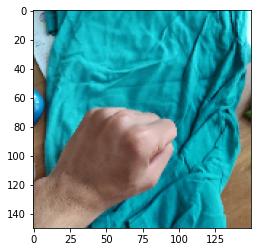

In [24]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
 
uploaded = files.upload()
 
for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
 
  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  
  print(fn)
  if classes[0,0]!=0:
    print('rock')
  elif classes[0,1]!=0:
    print('paper')
  else:
    print('scissors')